<a href="https://colab.research.google.com/github/Sau1o/PIS/blob/main/Identificando_e_Contando_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving imagem0riginal.png to imagem0riginal.png


Links da documentação oficial e material de apoio:  
[Thersholding - OTSU](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)  
[FindContours - cv2](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)  
[findContours - Medium](https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18)  
[findContours - Geeksforgeeks](https://medium.com/analytics-vidhya/opencv-findcontours-detailed-guide-692ee19eeb18)  
[cv2.RETR_EXTERNAL](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html)  



In [3]:
#Função para facilitar a escrita nas imagem
def escreve(img, texto, cor=(255,0,0)):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, texto, (10,20), fonte, 0.5, cor, 0,cv2.LINE_AA)

In [4]:
#Carregamento da imagem
imgColorida = cv2.imread('/content/imagem0riginal.png')

In [5]:
#se necessário, fazer o redimensionamento

In [6]:
#Passo 1: Conversão para tons de cinza
img = cv2.cvtColor(imgColorida, cv2.COLOR_BGR2GRAY)

In [7]:
#Passo 2: Blur/Suavização da imagem
suave = cv2.blur(img, (7, 7))

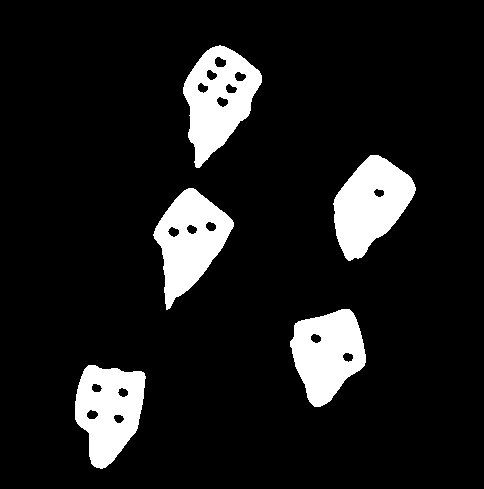

In [9]:
#Passo 3: Binarização resultando em pixels brancos e pretos
T,th2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
bin = suave.copy()
bin[bin > T] = 255
bin[bin < 255] = 0
bin = cv2.bitwise_not(bin)

In [10]:
#Passo 4: Detecção de bordas com Canny
bordas = cv2.Canny(bin, 70, 150)

In [12]:
#Passo 5: Identificação e contagem dos contornos da imagem
#cv2.RETR_EXTERNAL = conta apenas os contornos externos
(objetos, lx) = cv2.findContours(bordas.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
escreve(img, "Imagem em tons de cinza", 0)
escreve(suave, "Suavizacao com Blur", 0)
escreve(bin, "Binarizacao com Metodo Otsu", 255)
escreve(bordas, "Detector de bordas Canny", 255)
temp = np.vstack([np.hstack([img, suave]),np.hstack([bin, bordas])])

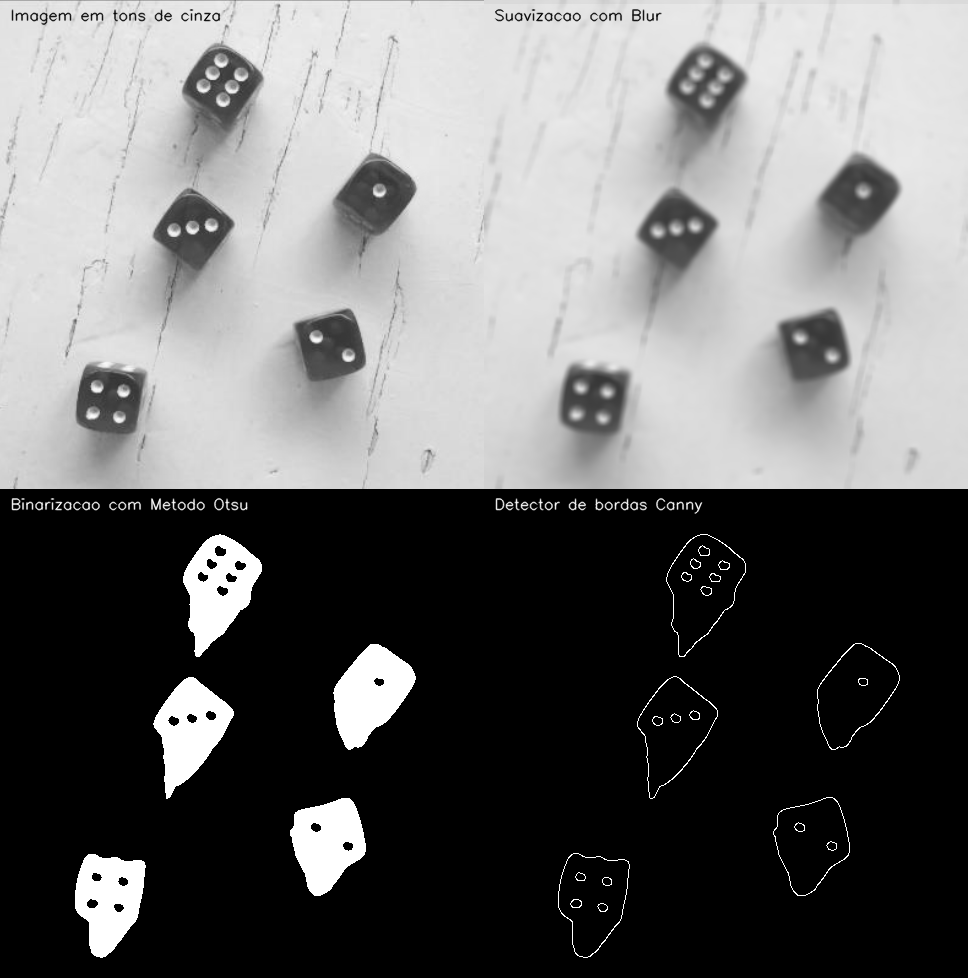

In [14]:
cv2_imshow(temp)

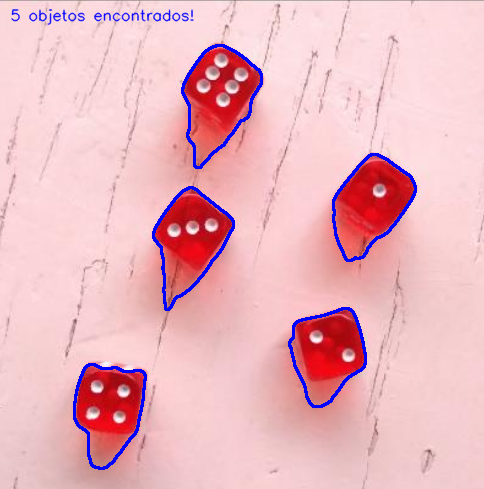

In [16]:
imgC2 = imgColorida.copy()

cv2.drawContours(imgC2, objetos, -1, (255, 0, 0), 2)
escreve(imgC2, str(len(objetos))+" objetos encontrados!")
cv2_imshow(imgC2)